In [1]:
import time
start_time=time.time()

In [2]:
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interpolate
import numpy as np
import pandas as pd
import json

from astropy.io import fits
import astropy.units as u

#plt.rcParams["font.family"]="Times New Roman"
#plt.rcParams["font.size"]="20"

Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'Hanel-EON-O-RV'

In [8]:
name_export='Hanel-EON-O'

Input data of the region

In [9]:
dist = 410 #parsecs
pix = 1.0 #arcmin 
seeing = 0.9 #seeing arcsec FWHM

In [10]:
pc = dist*(2*np.pi) / (360 * 60) #arcsec to parsecs
s0 = (seeing*pc)/2.355 #seeing pc RMS
pc,s0

(0.11926416555294585, 0.045578661994756374)

In [11]:
orion=pd.read_table(str(datapath_obs)+ '/' +data_file+'.csv', delimiter=',',header=None)
orion.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,23.631818,19.600000,16.845455,12.900000,14.445455,11.695455,9.250000,6.700000,2.904545,3.268182,...,1.268182,4.445455,5.154545,7.240909,7.663636,12.127273,16.390909,17.377273,19.995455,18.290909
std,6.417342,10.213064,12.257193,13.645372,13.044456,13.661154,13.484974,13.015229,10.819008,10.856439,...,8.056254,10.318994,11.265317,12.791651,13.579976,13.397910,13.103141,11.619152,9.853038,11.238112
min,-5.100000,-0.100000,-3.300000,-5.600000,-4.100000,-4.000000,-4.100000,-5.700000,-6.300000,-5.800000,...,-5.300000,-3.800000,-5.400000,-6.000000,-6.100000,-5.000000,-6.100000,-3.100000,-8.100000,-1.100000
25%,25.000000,25.000000,1.325000,-0.700000,-0.500000,-1.250000,-2.100000,-3.025000,-3.000000,-3.125000,...,-2.650000,-2.000000,-2.275000,-2.525000,-3.425000,-1.875000,1.525000,6.200000,25.000000,8.425000
50%,25.000000,25.000000,25.000000,25.000000,25.000000,12.950000,0.250000,-0.150000,-0.900000,-1.900000,...,-0.400000,-0.650000,0.000000,0.800000,-0.300000,14.900000,25.000000,25.000000,25.000000,25.000000
75%,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,0.100000,0.975000,...,2.050000,4.625000,4.500000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
max,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000


In [12]:
#orion[orion == 25] = 'nan' 

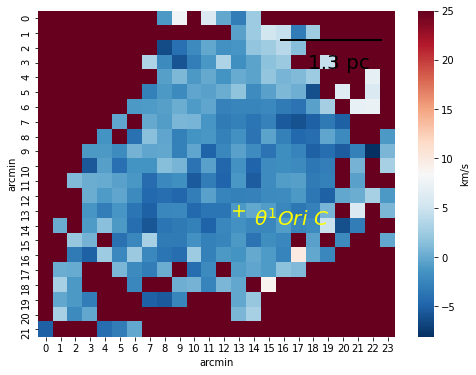

In [13]:
fig, ax = plt.subplots(figsize = (8,6))

sns.heatmap(orion,cmap='RdBu_r',cbar_kws={'label': 'km/s'})

plt.scatter(13.5, 13.5, marker='+', color='yellow', s=150)
ax.set(xlabel='arcmin', ylabel='arcmin')
ax.text(0.93, 0.81, '1.3 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
plt.axhline(y=2, xmin=0.68, xmax=0.96, linewidth=2, color = 'k')
plt.text(14.5, 14.5, '$θ^{1}Ori\ C$', fontsize=20, color='yellow')

plt.show()

Matrix To list

In [14]:
data=orion.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})
data.describe()

,X,Y,RV
count,528.000000,528.000000,528.000000
mean,10.500000,11.500000,10.130492
std,6.350305,6.928751,13.141196
min,0.000000,0.000000,-8.100000
25%,5.000000,5.750000,-1.900000
50%,10.500000,11.500000,1.900000
75%,16.000000,17.250000,25.000000
max,21.000000,23.000000,25.000000


In [15]:
m=data.RV<25
data=data[m]

In [16]:
data[m].describe()

<ipython-input-16-9541acf80d3b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[m].describe()


,X,Y,RV
count,300.000000,300.000000,300.000000
mean,10.476667,11.823333,-1.170333
std,5.163169,5.467336,2.763998
min,0.000000,0.000000,-8.100000
25%,6.750000,8.000000,-2.925000
50%,11.000000,12.000000,-1.300000
75%,14.000000,16.000000,0.100000
max,21.000000,23.000000,9.900000


<ipython-input-17-ae0f6994de5e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datal=data[m].copy()


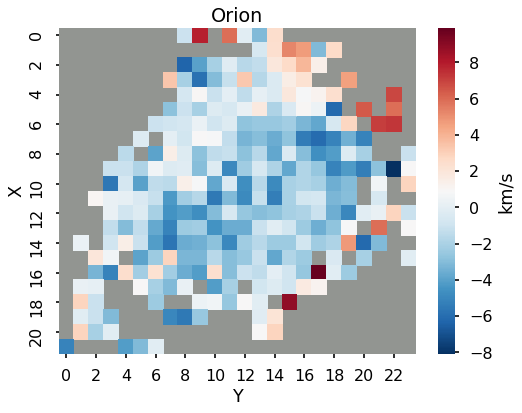

In [17]:
plt.style.use([
    "seaborn-poster",
])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

datal=data[m].copy()

dataH_rv=(datal.round(2)).pivot(index='X', columns='Y', values='RV')
sns.heatmap(dataH_rv, cmap="RdBu_r",cbar_kws={'label': 'km/s'})
plt.title('Orion')
ax.set_facecolor('xkcd:gray')


#plt.savefig('Imgs//VF//N604.pdf', bbox_inches='tight')


Fits file

In [18]:
hdu = fits.PrimaryHDU(dataH_rv)
hdu.writeto(str(datapath_obs)+ '/' +data_file + '.fits')

<ipython-input-19-f0a02e76f95c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(data[m].RV-data[m].RV.mean(),bins=25)


Text(0.5, 6.799999999999979, 'Radial velocity [km/s]')

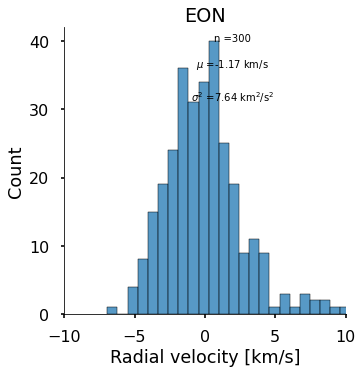

In [19]:
sns.displot(data[m].RV-data[m].RV.mean(),bins=25)
plt.xlim(-10,10)

plt.text(0.45, 0.86,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.78,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.68,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('EON')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlabel('Radial velocity [km/s]')


Export data

In [20]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
         name_export : np.array(data[m]),
      }
data_export_list

<ipython-input-20-9a1e25a474b1>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  name_export : np.array(data[m]),


{'name': 'Hanel-EON-O',
 'pc': 0.11926416555294585,
 's0': 0.045578661994756374,
 'pix': 1.0,
 'Hanel-EON-O': array([[ 0. ,  8. , -1. ],
        [ 0. ,  9. ,  7.9],
        [ 0. , 11. ,  5.9],
        [ 0. , 12. , -0.1],
        [ 0. , 13. , -3.1],
        [ 0. , 14. ,  2.5],
        [ 1. , 13. , -0.6],
        [ 1. , 14. ,  2.4],
        [ 1. , 15. ,  5.3],
        [ 1. , 16. ,  4.7],
        [ 1. , 17. , -3.1],
        [ 1. , 18. ,  2.6],
        [ 2. ,  8. , -6.3],
        [ 2. ,  9. , -4. ],
        [ 2. , 10. , -2.1],
        [ 2. , 11. , -0.2],
        [ 2. , 12. , -1.6],
        [ 2. , 13. , -1.3],
        [ 2. , 14. ,  1.9],
        [ 2. , 15. ,  2.6],
        [ 2. , 16. ,  3.9],
        [ 2. , 17. ,  1.4],
        [ 3. ,  7. ,  3.4],
        [ 3. ,  8. , -2.1],
        [ 3. ,  9. , -5.8],
        [ 3. , 10. , -3. ],
        [ 3. , 11. , -1.2],
        [ 3. , 12. ,  3.3],
        [ 3. , 13. , -1.7],
        [ 3. , 14. , -0.4],
        [ 3. , 15. ,  1.6],
        [ 3. , 16. ,  2

In [21]:
data_export_matrix = {
       'name': name_export, 
       'pc' : pc,
       's0' : s0,
       'pix' : pix,
#       'sb' :np.array(dataH_f),
       'vv' : np.array(dataH_rv),
#       'ss' : np.array(dataH_s),

      }

data_export_matrix

{'name': 'Hanel-EON-O',
 'pc': 0.11926416555294585,
 's0': 0.045578661994756374,
 'pix': 1.0,
 'vv': array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1. ,  7.9,  nan,
          5.9, -0.1, -3.1,  2.5,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan, -0.6,  2.4,  5.3,  4.7, -3.1,  2.6,  nan,  nan,  nan,
          nan,  nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -6.3, -4. , -2.1,
         -0.2, -1.6, -1.3,  1.9,  2.6,  3.9,  1.4,  nan,  nan,  nan,  nan,
          nan,  nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  3.4, -2.1, -5.8, -3. ,
         -1.2,  3.3, -1.7, -0.4,  1.6,  2.3,  nan,  nan,  4.6,  nan,  nan,
          nan,  nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -0.7,  1. , -1.1,
          0. , -1.4,  0.1, -0.4,  1.9,  0.8,  1.2,  2.4,  nan,  nan,  nan,
          6.9,  nan],
        [ nan,  nan,  nan,  nan,  nan,  

In [22]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [23]:
jsonfilename =name_export +"-m.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_matrix, fp=f, indent=3, cls=MyEncoder)

In [24]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [25]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 5.569822311401367 seconds ---


In [26]:
!jupyter nbconvert --to script --no-prompt otv-Hanel-EON-O.ipynb

[NbConvertApp] Converting notebook otv-Hanel-EON-O.ipynb to script
[NbConvertApp] Writing 4082 bytes to otv-Hanel-EON-O.py
